In [1]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("C:/Users/vadre/OneDrive/Desktop/data.csv")

In [3]:
df.head()
unique_values = df['Trip Verified'].unique()
print(unique_values)

['no']


In [4]:
# Check data types of all columns
print(df.dtypes)


Title                      object
Content                    object
Trip Verified              object
Overall Rating              int64
Aircraft                   object
Type Of Traveller          object
Seat Type                  object
Date Flown                 object
Seat Comfort              float64
Cabin Staff Service       float64
Food & Beverages          float64
Inflight Entertainment    float64
Ground Service            float64
Wifi & Connectivity       float64
Value For Money             int64
Recommended                object
Start Route                object
End Route                  object
dtype: object


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   1000 non-null   object 
 1   Content                 1000 non-null   object 
 2   Trip Verified           1000 non-null   object 
 3   Overall Rating          1000 non-null   int64  
 4   Aircraft                528 non-null    object 
 5   Type Of Traveller       998 non-null    object 
 6   Seat Type               1000 non-null   object 
 7   Date Flown              1000 non-null   object 
 8   Seat Comfort            913 non-null    float64
 9   Cabin Staff Service     903 non-null    float64
 10  Food & Beverages        780 non-null    float64
 11  Inflight Entertainment  520 non-null    float64
 12  Ground Service          944 non-null    float64
 13  Wifi & Connectivity     321 non-null    float64
 14  Value For Money         1000 non-null   i

In [6]:
df.describe()

,Overall Rating,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money
count,1000.0,913.000000,903.000000,780.000000,520.000000,944.000000,321.000000,1000.000000
mean,10.0,2.717415,3.112957,2.623077,2.748077,2.492585,2.196262,2.316000
std,0.0,1.386453,1.524551,1.466434,1.442540,1.532244,1.477578,1.457487
min,10.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,10.0,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,10.0,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,10.0,4.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000
max,10.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
df.shape

(1000, 18)

In [8]:
# Check if there are any duplicate rows (returns True/False for each row)
df.duplicated(subset='Content').sum()


0

In [9]:
df['Review'] = df['Title'] + ". " + df['Content']
df = df.drop(columns=['Title', 'Content'], axis =1)


# Reorder columns to move 'Review' to the first position
cols = ['Review'] + [col for col in df.columns if col != 'Review']
df = df[cols]


In [10]:
df.head(4)

,Review,Trip Verified,Overall Rating,Aircraft,Type Of Traveller,Seat Type,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Start Route,End Route
0,managed to get everything right. This time Bri...,no,10,Boeing 777,Business,Premium Economy,March 2025,5.0,5.0,4.0,4.0,5.0,4.0,5,yes,Gatwick,Antigua
1,The seats were excellent. The seats were excel...,no,10,NaN,Couple Leisure,Premium Economy,February 2025,5.0,4.0,3.0,5.0,4.0,NaN,5,yes,Mumbai,London
2,the crew were awful. After the nightmare of ge...,no,10,A350,Couple Leisure,Business Class,February 2025,4.0,1.0,2.0,3.0,4.0,NaN,3,no,Nairobi,London
3,not use British Airways on this route. Prior t...,no,10,A320,Solo Leisure,Economy Class,February 2025,4.0,1.0,NaN,NaN,2.0,NaN,2,no,London Gatwick,Marrakech


In [11]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment based on the 'Review' column
def classify_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'Review' column
df['Sentiment'] = df['Review'].apply(classify_sentiment)


In [12]:
df.head()


,Review,Trip Verified,Overall Rating,Aircraft,Type Of Traveller,Seat Type,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Start Route,End Route,Sentiment
0,managed to get everything right. This time Bri...,no,10,Boeing 777,Business,Premium Economy,March 2025,5.0,5.0,4.0,4.0,5.0,4.0,5,yes,Gatwick,Antigua,Positive
1,The seats were excellent. The seats were excel...,no,10,NaN,Couple Leisure,Premium Economy,February 2025,5.0,4.0,3.0,5.0,4.0,NaN,5,yes,Mumbai,London,Positive
2,the crew were awful. After the nightmare of ge...,no,10,A350,Couple Leisure,Business Class,February 2025,4.0,1.0,2.0,3.0,4.0,NaN,3,no,Nairobi,London,Positive
3,not use British Airways on this route. Prior t...,no,10,A320,Solo Leisure,Economy Class,February 2025,4.0,1.0,NaN,NaN,2.0,NaN,2,no,London Gatwick,Marrakech,Negative
4,they still havent replied. I flew from Amsterd...,no,10,NaN,Business,Premium Economy,November 2024,3.0,3.0,3.0,3.0,1.0,NaN,1,no,Amsterdam,Las Vegas via London,Negative


## Missing Values

In [14]:
df.isnull().sum()

Review                      0
Trip Verified               0
Overall Rating              0
Aircraft                  472
Type Of Traveller           2
Seat Type                   0
Date Flown                  0
Seat Comfort               87
Cabin Staff Service        97
Food & Beverages          220
Inflight Entertainment    480
Ground Service             56
Wifi & Connectivity       679
Value For Money             0
Recommended                 0
Start Route                 4
End Route                   6
Sentiment                   0
dtype: int64

In [15]:

df.loc[:, 'Aircraft'] = df['Aircraft'].fillna('Unknown')
df.loc[:, 'Start Route'] = df['Start Route'].fillna('Unknown')
df.loc[:, 'End Route'] = df['End Route'].fillna('Unknown')

# Drop the 'Wifi & Connectivity' column
df.drop(columns=['Wifi & Connectivity'], inplace=True)

# Confirm the changes
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Review                  1000 non-null   object 
 1   Trip Verified           1000 non-null   object 
 2   Overall Rating          1000 non-null   int64  
 3   Aircraft                1000 non-null   object 
 4   Type Of Traveller       998 non-null    object 
 5   Seat Type               1000 non-null   object 
 6   Date Flown              1000 non-null   object 
 7   Seat Comfort            913 non-null    float64
 8   Cabin Staff Service     903 non-null    float64
 9   Food & Beverages        780 non-null    float64
 10  Inflight Entertainment  520 non-null    float64
 11  Ground Service          944 non-null    float64
 12  Value For Money         1000 non-null   int64  
 13  Recommended             1000 non-null   object 
 14  Start Route             1000 non-null   o

Sentiment         Negative  Neutral  Positive
Aircraft                                     
777-300 and A320         1        0         0
A230                     1        0         0
A319                     6        0        11
A319 / A320              0        0         1
A319 / A321NEO           1        0         0
...                    ...      ...       ...
Embraer                  2        0         1
Embraer 190              0        0         3
Embraer 195              0        0         1
Embraer-190              0        0         1
Unknown                322        5       145

[73 rows x 3 columns]


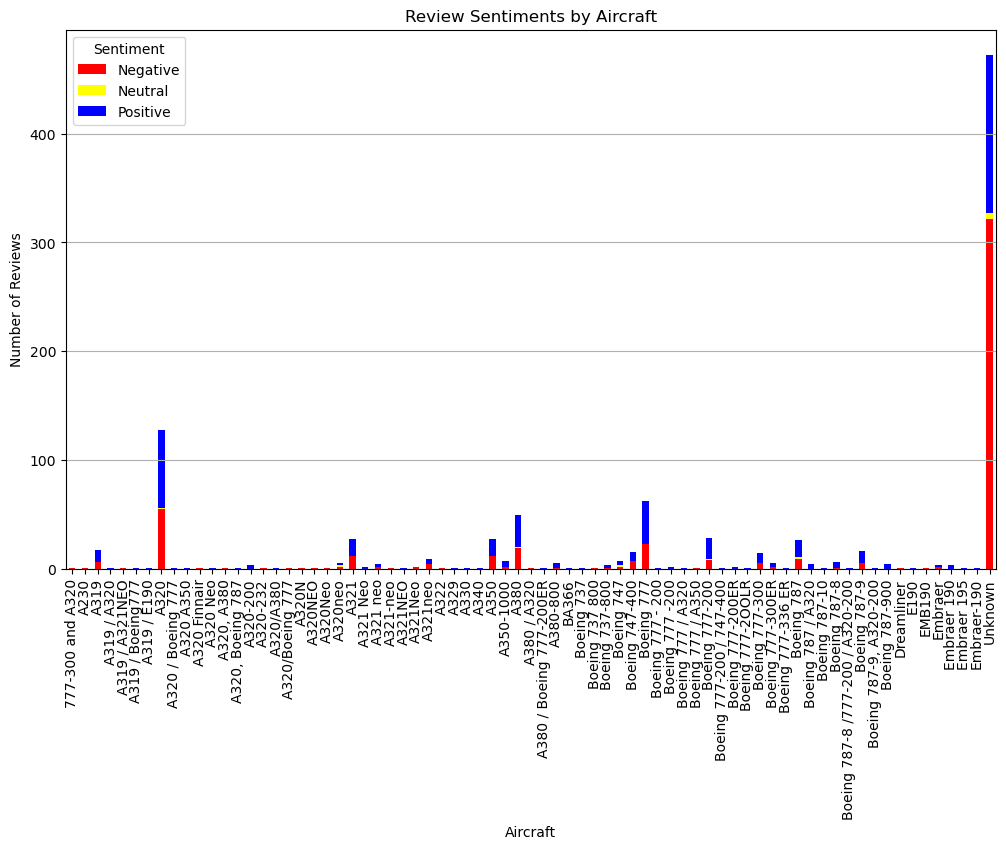

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Define custom color mapping
colors = {'Negative': 'red', 'Neutral': 'yellow', 'Positive': 'blue'}

# Ensure all sentiment categories are present
all_sentiments = ['Negative', 'Neutral', 'Positive']

# Count reviews by 'Aircraft' and 'Sentiment'
reviews_count = df.groupby(['Aircraft', 'Sentiment']).size().unstack(fill_value=0)

# Reindex to ensure all sentiment categories are represented
reviews_count = reviews_count.reindex(columns=all_sentiments, fill_value=0)

# Display the count
print(reviews_count)

# Visualization with custom colors
reviews_count.plot(kind='bar', stacked=True, figsize=(12, 7), color=[colors[sentiment] for sentiment in reviews_count.columns])
plt.title('Review Sentiments by Aircraft')
plt.xlabel('Aircraft')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


## Visualizations

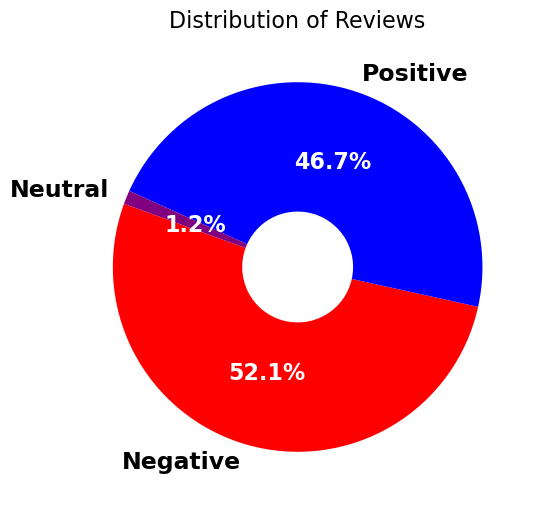

In [18]:
# Count the number of reviews for each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Extract labels and values
labels = sentiment_counts.index
values = sentiment_counts.values

# Assign specific colors: red for negative, blue for positive, white for neutral
color_map = {'Negative': 'red', 'Positive': 'blue', 'Neutral': 'purple'}
colors = [color_map[label] for label in labels]

# Plotting the donut chart with increased font size
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=160,
    wedgeprops=dict(width=0.7),
    colors=colors,
    textprops=dict(fontsize=17, weight = 'bold')  # Increased font size
)

# Set autotexts color and size for better visibility
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(16)

plt.title('Distribution of Reviews', fontsize=16)
plt.show()

## Encoding

In [20]:

categorical_cols = ['Type Of Traveller', 'Seat Type', 'Sentiment', 'Start Route', 'End Route', 'Aircraft']

# Apply label encoding for categorical columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))
    
df.head()

,Review,Trip Verified,Overall Rating,Aircraft,Type Of Traveller,Seat Type,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Start Route,End Route,Sentiment
0,managed to get everything right. This time Bri...,no,10,45,0,3,March 2025,5.0,5.0,4.0,4.0,5.0,5,yes,60,14,2
1,The seats were excellent. The seats were excel...,no,10,72,1,3,February 2025,5.0,4.0,3.0,5.0,4.0,5,yes,119,141,2
2,the crew were awful. After the nightmare of ge...,no,10,33,1,0,February 2025,4.0,1.0,2.0,3.0,4.0,3,no,122,141,2
3,not use British Airways on this route. Prior t...,no,10,7,3,1,February 2025,4.0,1.0,NaN,NaN,2.0,2,no,95,172,0
4,they still havent replied. I flew from Amsterd...,no,10,72,0,3,November 2024,3.0,3.0,3.0,3.0,1.0,1,no,6,138,0


In [21]:
# Split 'Date Flown' into 'Month Flown' and 'Year Flown'
df[['Month Flown', 'Year Flown']] = df['Date Flown'].str.split(' ', expand=True)

# Drop the original 'Date Flown' column if no longer needed
df.drop(columns=['Date Flown'], inplace=True)

# Confirm the changes
print(df[['Month Flown', 'Year Flown']].head())


  Month Flown Year Flown
0       March       2025
1    February       2025
2    February       2025
3    February       2025
4    November       2024


In [22]:
# Filter for positive reviews
positive_reviews = df[df['Sentiment'] == 2]

# Total reviews per year
total_reviews_per_year = df.groupby('Year Flown').size()

# Positive reviews per year
positive_reviews_per_year = positive_reviews.groupby('Year Flown').size()

# Calculate the positive review rate
positive_rate = (positive_reviews_per_year / total_reviews_per_year) * 100

# Combine into a single DataFrame for clarity
review_summary = pd.DataFrame({
    'Total Reviews': total_reviews_per_year,
    'Positive Reviews': positive_reviews_per_year,
    'Positive Rate (%)': positive_rate
}).fillna(0).astype({'Total Reviews': int, 'Positive Reviews': int, 'Positive Rate (%)': float})

# Find the year with the most positive reviews
max_positive_year = review_summary['Positive Reviews'].idxmax()

print(f"The year with the most positive reviews is {max_positive_year}.")
print("\nSummary Table:")
print(review_summary)


The year with the most positive reviews is 2023.

Summary Table:
            Total Reviews  Positive Reviews  Positive Rate (%)
Year Flown                                                    
2019                  138                82          59.420290
2020                   94                42          44.680851
2021                   93                46          49.462366
2022                  217               107          49.308756
2023                  278               113          40.647482
2024                  169                69          40.828402
2025                   11                 8          72.727273


In [23]:
# Mapping months to numbers
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Apply the mapping to 'Month Flown'
df['Month Flown'] = df['Month Flown'].map(month_map)

# Confirm the changes
print(df[['Month Flown', 'Year Flown']].head())


   Month Flown Year Flown
0            3       2025
1            2       2025
2            2       2025
3            2       2025
4           11       2024


In [24]:
# Map 'yes' to 1 and 'no' to 0 for the 'Recommended' column
df['Recommended'] = df['Recommended'].map({'yes': 1, 'no': 0})

# Confirm the changes
print(df['Recommended'].value_counts())

Recommended
0    688
1    312
Name: count, dtype: int64


## Imputation

In [26]:
unique_values = df['Trip Verified'].unique()

In [27]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder

# Step 1: Drop the 'Review' column
df.drop(columns=['Review'], inplace=True)
df.drop(columns=['Trip Verified'], inplace=True)

# Step 3: Apply Iterative Imputation on all columns
imputer = IterativeImputer(random_state=0)
df[:] = imputer.fit_transform(df)

# Step 4: Round rating columns if they are supposed to be integers
rating_cols = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment']
df[rating_cols] = df[rating_cols].round().astype(int)

# Step 5: Confirm no missing values remain
print(df.isnull().sum())


Overall Rating            0
Aircraft                  0
Type Of Traveller         0
Seat Type                 0
Seat Comfort              0
Cabin Staff Service       0
Food & Beverages          0
Inflight Entertainment    0
Ground Service            0
Value For Money           0
Recommended               0
Start Route               0
End Route                 0
Sentiment                 0
Month Flown               0
Year Flown                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Overall Rating          1000 non-null   int64  
 1   Aircraft                1000 non-null   int32  
 2   Type Of Traveller       1000 non-null   int32  
 3   Seat Type               1000 non-null   int32  
 4   Seat Comfort            1000 non-null   int32  
 5   Cabin Staff Service     1000 non-null   int32  
 6   Food

Sentiment_Label  Negative  Neutral  Positive
Year Flown                                  
2019                   54        2        82
2020                   50        2        42
2021                   46        1        46
2022                  107        3       107
2023                  163        2       113
2024                   98        2        69
2025                    3        0         8


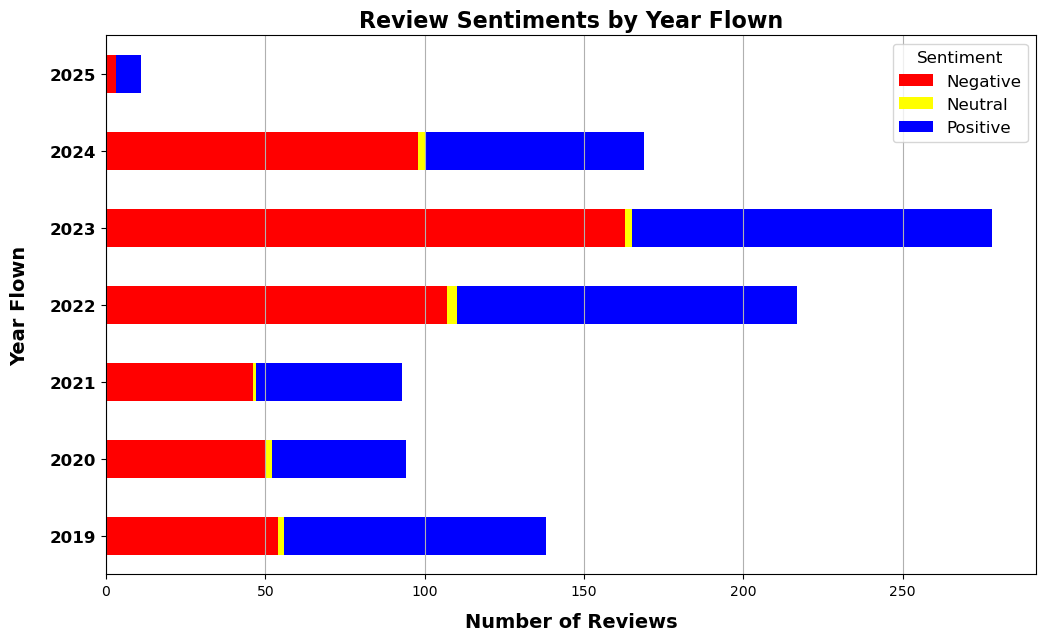

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Define custom color mapping
colors = {'Negative': 'red', 'Neutral': 'yellow', 'Positive': 'blue'}

# Ensure all sentiment categories are present
all_sentiments = ['Negative', 'Neutral', 'Positive']

# Mapping sentiment values to labels
sentiment_labels = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
df['Sentiment_Label'] = df['Sentiment'].map(sentiment_labels)

# Convert 'Year Flown' to integer to remove decimals
df['Year Flown'] = df['Year Flown'].astype(int)

# Count reviews by 'Year Flown' and 'Sentiment'
reviews_count = df.groupby(['Year Flown', 'Sentiment_Label']).size().unstack(fill_value=0)

# Reindex to ensure all sentiment categories are represented
reviews_count = reviews_count.reindex(columns=all_sentiments, fill_value=0)

# Display the count
print(reviews_count)

# Visualization with custom colors for horizontal stacked bar chart
ax = reviews_count.plot(kind='barh', stacked=True, figsize=(12, 7),
                        color=[colors[sentiment] for sentiment in all_sentiments])

# Adding bold titles and labels with larger fonts
plt.title('Review Sentiments by Year Flown', fontsize=16, fontweight='bold')
plt.xlabel('Number of Reviews', fontsize=14, fontweight='bold', labelpad=10)  # Adding padding for spacing
plt.ylabel('Year Flown', fontsize=14, fontweight='bold', labelpad=15)  # Added padding to y-axis label

# Make y-tick labels (years) bold
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, fontweight='bold')

# Customizing legend
plt.legend(title='Sentiment', title_fontsize=12, fontsize=12)

plt.grid(axis='x')
plt.show()


In [54]:
df.head()

,Overall Rating,Aircraft,Type Of Traveller,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Start Route,End Route,Sentiment,Month Flown,Year Flown,Sentiment_Label
0,10,45,0,3,5,5,4,4,5.0,5,1,60,14,2,3,2025,Positive
1,10,72,1,3,5,4,3,5,4.0,5,1,119,141,2,2,2025,Positive
2,10,33,1,0,4,1,2,3,4.0,3,0,122,141,2,2,2025,Positive
3,10,7,3,1,4,1,2,2,2.0,2,0,95,172,0,2,2025,Negative
4,10,72,0,3,3,3,3,3,1.0,1,0,6,138,0,11,2024,Negative
